In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

## Classifying newswires: a multiclass classification example

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data.shape

(8982,)

In [6]:
train_data[10] #Single Review.

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
# Decoding newswires back to text.
word_index = reuters.get_word_index()
# print(word_index)
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
# print(reverse_word_index)


In [8]:
train_labels[0]

3

## Preparing Data

In [9]:
# Encoding data.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
# Now vectorizing labels.
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
# one_hot_train_labels[0]

## Model Definition

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Compile Model

In [12]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## Setting aside a validation set

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the Model

In [14]:
history = model.fit(partial_x_train,partial_y_train,epochs=5,batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 1s 186us/sample - loss: 2.6447 - acc: 0.5482 - val_loss: 1.7635 - val_acc: 0.6590
Epoch 2/5
7982/7982 [==============================] - 1s 97us/sample - loss: 1.4444 - acc: 0.7036 - val_loss: 1.3196 - val_acc: 0.7180
Epoch 3/5
7982/7982 [==============================] - 1s 95us/sample - loss: 1.0594 - acc: 0.7724 - val_loss: 1.1329 - val_acc: 0.7590
Epoch 4/5
7982/7982 [==============================] - 1s 96us/sample - loss: 0.8286 - acc: 0.8246 - val_loss: 1.0428 - val_acc: 0.7810
Epoch 5/5
7982/7982 [==============================] - 1s 106us/sample - loss: 0.6550 - acc: 0.8662 - val_loss: 0.9621 - val_acc: 0.8000


## Plotting the training and validation loss

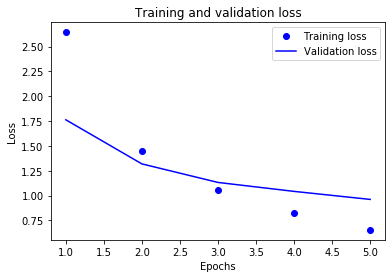

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the training and validation accuracy 

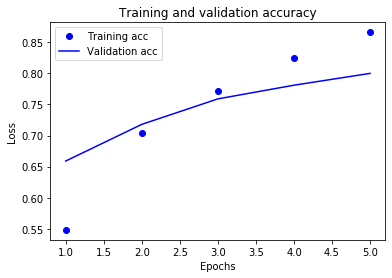

In [16]:
plt.clf() #Clear the figure
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()